In [65]:
# Import tools needed for analysis and visualization
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Handling

In [66]:
titanic_df = pd.read_csv('titanic-data.csv')

In [67]:
# Show preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# Overall information for the dataset 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are a lot of missing values for Cabin info. This issue will be handled later by dropping them from dataframe for further analysis.

### Passengers Distribution by Gender

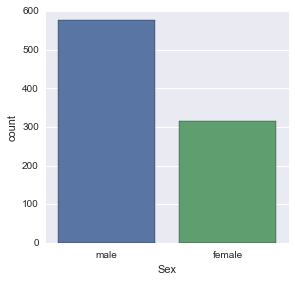

In [69]:
sns.factorplot('Sex',data=titanic_df,kind= 'count')

### Passengers Distribution by Class and Gender

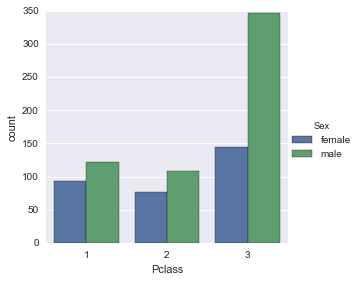

In [70]:
sns.factorplot('Pclass',data=titanic_df,hue ='Sex', kind='count',hue_order = ['female','male'])

### Add New Category Child
Create a function called **male_female_child** that sorts through a passenger and categorize person under 16 as child.

In [71]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

Apply the function to the data and preview first 10 rows.

In [72]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


### Passengers Distribution by Class and Gender + Child

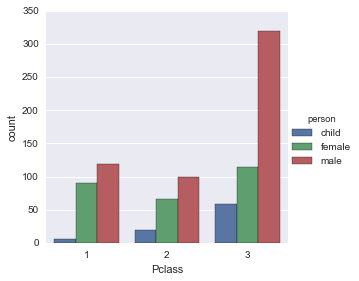

In [73]:
sns.factorplot('Pclass',data=titanic_df, hue='person',kind = 'count', hue_order = ['child','female','male'])

Actual number comparison of  male, female, and child

In [74]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

### Passengers Distribution by Age: histogram

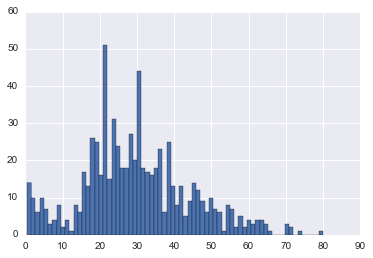

In [75]:
titanic_df['Age'].hist(bins=70)

In [76]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Passengers Distribution by Age and Gender: KDE plots

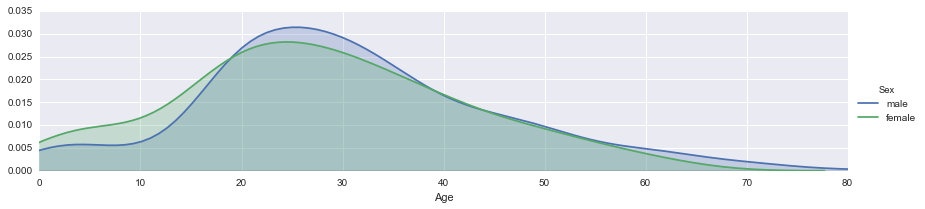

In [77]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

### Passengers Distribution by Age and Gender + Child: KDE plots

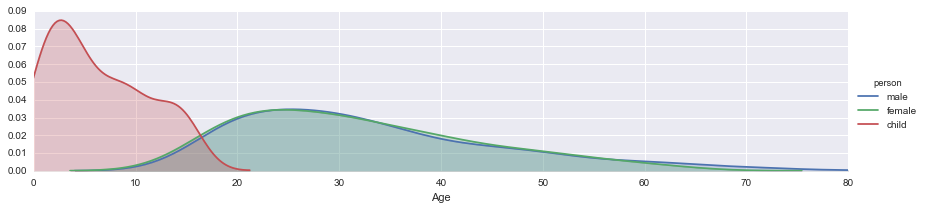

In [78]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,oldest))
fig.add_legend()

### Passengers Distribution by Age and Class: KDE plots

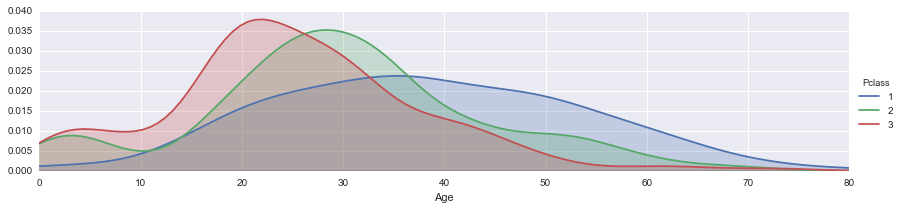

In [79]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest))
fig.add_legend()

### Drop missing values in Cabin columns

In [80]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

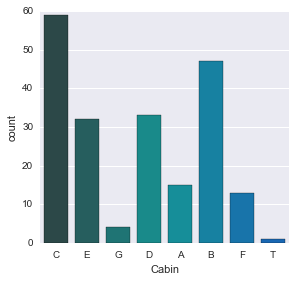

In [104]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df, palette ='winter_d',kind = 'count')

### Passengers Distribution by Deck Plans
Since T Deck did not exist in Titanic deck plans, removing the dataset associated with T Deck.

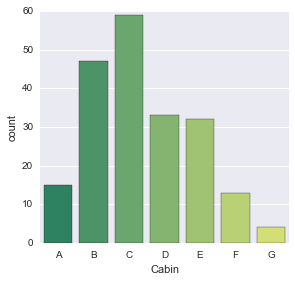

In [106]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data = cabin_df,palette='summer',kind='count',order=list('ABCDEFG'))

### Passengers Distribution by Boarding Port and Class

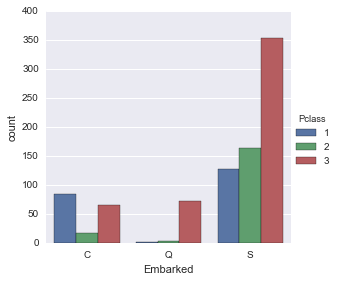

In [107]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass', order = ['C','Q','S'])

### Add New Column 'Alone'
To detemine whether a person is traveling alone, first add up Number of Siblings/Spouses annd Number of Parents/Children.  Then, converting to 'Alone' and 'With Family' for the sum equals 0 and any number above that respectively.

In [108]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

### Passengers Distribution by Traveling Alone vs With Family

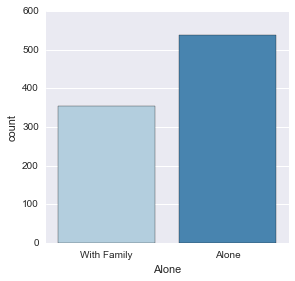

In [109]:
sns.factorplot('Alone', data=titanic_df, kind= 'count',palette = 'Blues')

### Passengers Distribution by Class and Traveling Alone vs With Family

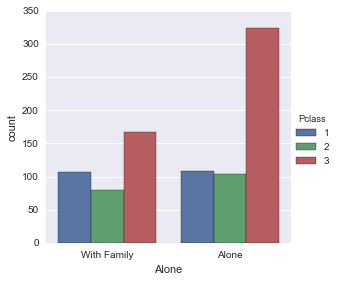

In [126]:
sns.factorplot('Alone', data=titanic_df, hue='Pclass', kind= 'count')

### Distribution of Survival

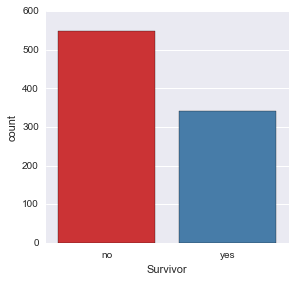

In [111]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data = titanic_df, kind = 'count',palette = 'Set1')

### Survival Rate by Class

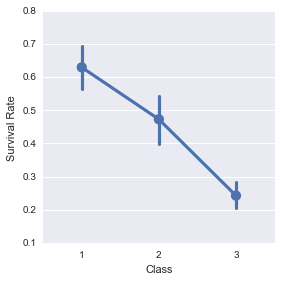

In [139]:
survival_rate_class = sns.factorplot(x='Pclass',y='Survived',data = titanic_df)
survival_rate_class.set_axis_labels('Class','Survival Rate')

### Survival Rate by Class and Gender + Child

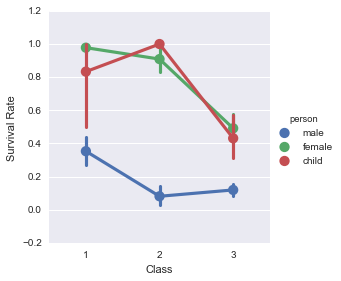

In [141]:
survival_rate_class_gender = sns.factorplot('Pclass','Survived',hue= 'person', data= titanic_df)
survival_rate_class_gender.set_axis_labels('Class','Survival Rate')

### Survival Rate by Class and Boarding Location

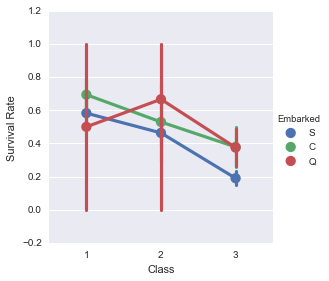

In [155]:
survival_rate_class_location = sns.factorplot('Pclass','Survived', hue= 'Embarked',data= titanic_df)
survival_rate_class_location.set_axis_labels('Class','Survival Rate')

### Survival Rate by Age

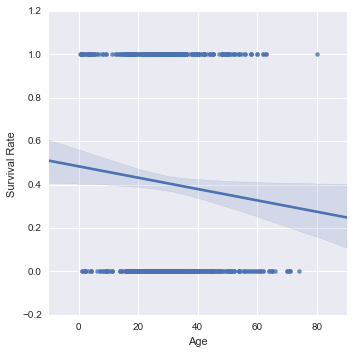

In [143]:
survival_rate_age=sns.lmplot('Age','Survived',data=titanic_df)
survival_rate_age.set_axis_labels('Age','Survival Rate')

### Survival Rate by Age and Class

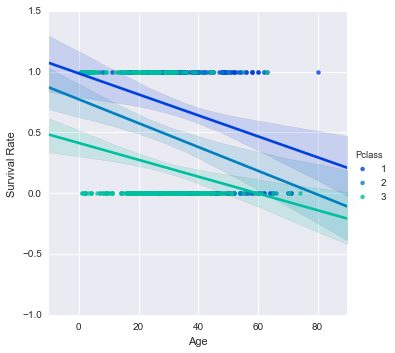

In [148]:
survival_rate_age_class=sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette = 'winter')
survival_rate_age_class.set_axis_labels('Age','Survival Rate')

### Survival Rate by Age and Class with Standar Deviation
Using x_bin argument to bin it by age and attached standard deviation.

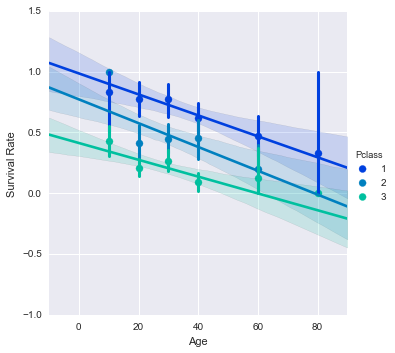

In [149]:
generations = [10,20,30,40,60,80]

survival_rate_age_class_std=sns.lmplot('Age','Survived',hue= 'Pclass', data = titanic_df, palette = 'winter',x_bins= generations)
survival_rate_age_class_std.set_axis_labels('Age','Survival Rate')

### Survival Rate by Age and Gender

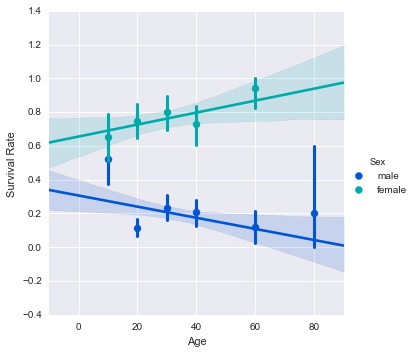

In [151]:
survival_rate_age_gender_std=sns.lmplot('Age','Survived',hue= 'Sex',data= titanic_df, palette = 'winter',x_bins =  generations)
survival_rate_age_gender_std.set_axis_labels('Age','Survival Rate')

### Add Deck Column
To find out survival rate of passengers on each deck, create definition that passes cabin and return Deck level. 

In [118]:
def decklevel(cabin):
    for level in cabin:
        return str(level)[0]
    
titanic_df['Deck'] = titanic_df[['Cabin']].apply(decklevel,axis= 1)

###  Survivors vs Non-survivors for each Deck by Gender

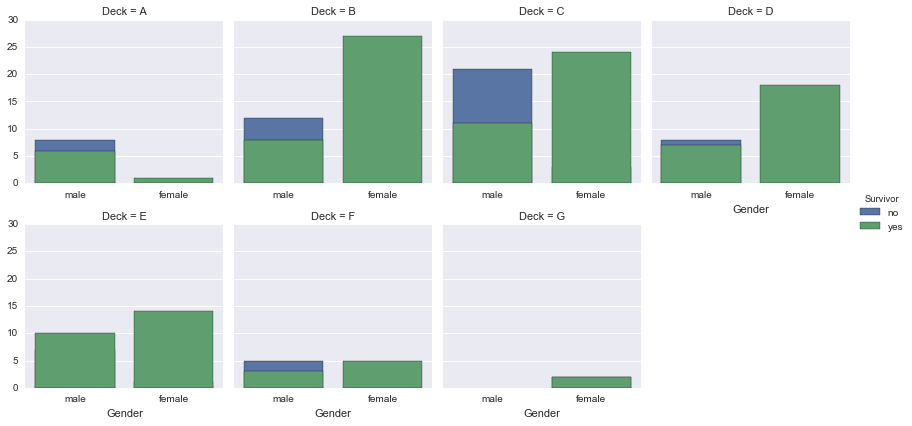

In [166]:
fig = sns.FacetGrid(titanic_df, col = 'Deck',col_order = list('ABCDEFG'),
                   hue = 'Survivor', col_wrap = 4, sharex= False)
fig.map(sns.countplot, 'Sex',order = ('male','female'))
fig.add_legend()
fig.set_axis_labels('Gender')

### Survival Rate by Deck

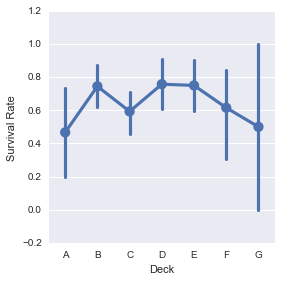

In [157]:
survival_rate_deck_std = sns.factorplot('Deck','Survived',data= titanic_df,order= list('ABCDEFG'))
survival_rate_deck_std.set_axis_labels('Deck','Survival Rate')

### Male vs Female Survival Rate by Deck

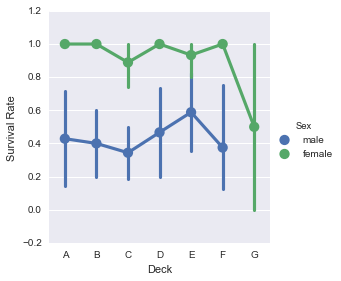

In [159]:
survival_rate_deck_gender_std=sns.factorplot('Deck','Survived',hue= 'Sex',data= titanic_df,order= list('ABCDEFG'))
survival_rate_deck_gender_std.set_axis_labels('Deck','Survival Rate')

### Class Survival Rate by Deck

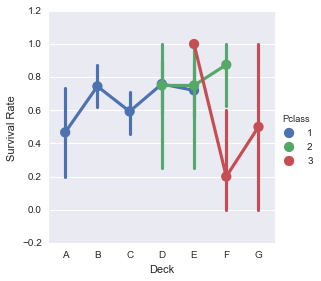

In [160]:
survival_rate_deck_class_std=sns.factorplot('Deck','Survived',hue= 'Pclass',data= titanic_df,order= list('ABCDEFG'))
survival_rate_deck_class_std.set_axis_labels('Deck','Survival Rate')

### Number of Family Members vs Survival Rate
To find out the relationship between number of family members and survival rate, create Family colum by adding Number of Siblings/Spouses and Number of Parents/Children.

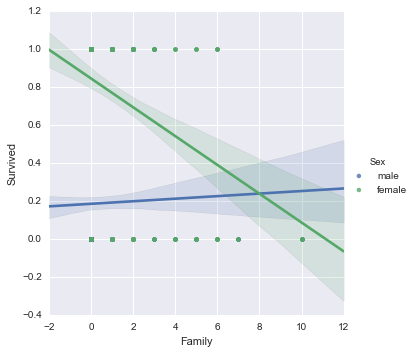

In [167]:
titanic_df['Family'] = titanic_df.SibSp + titanic_df.Parch
sns.lmplot('Family','Survived', hue='Sex', data = titanic_df)